In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%pwd

'/mnt/Z-LabData-6T/zlf-nfs-hdd/projects'

In [3]:
%cd '/mnt/Z-LabData-6T/zlf-nfs-hdd/projects/2020-OORL/ObjectOrientedRL'

/mnt/Z-LabData-6T/zlf-nfs-hdd/projects/2020-OORL/ObjectOrientedRL


In [4]:
import numpy as np

In [5]:
from envs.block_pushing import ObjectPool, ObjectLibrary

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

# test object covering on larger N

In [31]:
object_library = ObjectLibrary(
    num_objects_scene=5,
    num_objects_total=20,
    num_config_train=20,
    num_config_eval=20,

    scale_factor=16,
    width=4,
    height=4
)

> Num of training config: 20, Num of eval config: 20
> Num of all config: 40, Num of max possible config: 40
> Training/Eval config: [(3, 5, 7, 12, 15), (1, 4, 8, 13, 19), (1, 2, 4, 13, 15), (1, 2, 7, 18, 19), (8, 10, 12, 14, 15), (1, 4, 10, 13, 14), (1, 2, 9, 10, 14), (0, 2, 6, 8, 13), (3, 7, 11, 13, 16), (1, 7, 9, 12, 15), (0, 2, 8, 11, 14), (0, 2, 8, 16, 17), (5, 6, 12, 13, 17), (4, 8, 10, 12, 15), (3, 9, 10, 14, 15), (0, 2, 9, 14, 15), (1, 4, 7, 13, 17), (4, 5, 9, 13, 16), (4, 5, 7, 14, 18), (1, 3, 6, 8, 16)] [(1, 2, 5, 10, 17), (2, 4, 11, 12, 13), (5, 14, 15, 17, 19), (1, 3, 8, 11, 17), (0, 2, 5, 13, 18), (0, 3, 6, 13, 14), (3, 7, 11, 13, 14), (3, 8, 10, 12, 15), (2, 7, 11, 15, 17), (2, 5, 7, 11, 19), (2, 4, 8, 14, 15), (1, 4, 6, 13, 16), (1, 5, 9, 11, 18), (5, 6, 7, 8, 13), (1, 3, 7, 12, 15), (1, 3, 5, 7, 19), (0, 8, 13, 16, 19), (1, 9, 10, 13, 15), (3, 5, 7, 9, 13), (1, 3, 7, 10, 15)]
> Training/Eval config: [(3, 5, 7, 12, 15), (1, 4, 8, 13, 19), (1, 2, 4, 13, 15), (1, 2, 7, 18,

# test env

In [32]:
from envs.block_pushing import BlockPushingObjectLibrary

In [33]:
env = BlockPushingObjectLibrary(
    object_library=object_library,
    mode='train',
    num_objects_scene=5,
    num_objects_total=20,
    num_config_train=20,
    num_config_eval=20,

    scale_factor=16,
    width=4,
    height=4
)

> Extra kwargs: dict_keys(['scale_factor'])
[#objects in scene] K = 5 [#objects in library] N = 20


> id <-> positions: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19] [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (19, 0)]


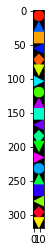

In [35]:
all_img = object_library.render_all('column')
plt.imshow(all_img.transpose(1, 2, 0))

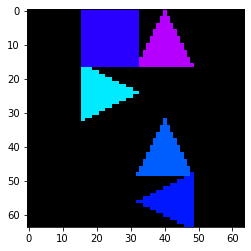

In [34]:
%matplotlib inline
obs = env.reset()
plt.imshow(obs[1].transpose(1, 2, 0))

{'moved': True, 'action': 35, 'mapped-action': 35, 'unmapped-action': 3, 'object': 0, 'direction': 3, 'mapped-object': 8}


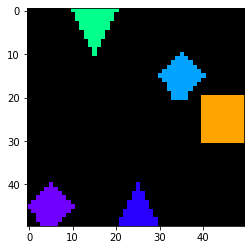

{'moved': True, 'action': 39, 'mapped-action': 39, 'unmapped-action': 7, 'object': 1, 'direction': 3, 'mapped-object': 9}


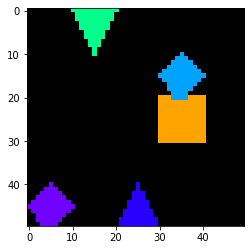

{'moved': True, 'action': 39, 'mapped-action': 39, 'unmapped-action': 7, 'object': 1, 'direction': 3, 'mapped-object': 9}


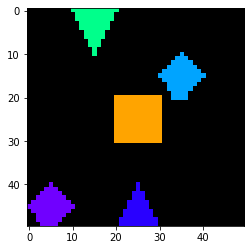

In [15]:
%matplotlib inline
for _ in range(3):
    obs, _, _, info = env.sample_step(filter_moving_prob=1.0)
    print(info)

    plt.imshow(obs[1].transpose(1, 2, 0))
    plt.show()

# test full env

In [16]:
object_library = ObjectLibrary(
    num_objects_scene=2,
    num_objects_total=4,
    num_config_train=3,
    num_config_eval=3,
)

env = BlockPushingObjectLibrary(
    object_library=object_library,
    mode='train',
    num_objects_scene=2,
    num_objects_total=4,
    num_config_train=3,
    num_config_eval=3,
    check_collision=True, filter_collision=True,
)

> Training/Eval config: [(0, 1), (1, 2), (1, 3)] [(2, 3), (0, 3), (0, 2)]
> Training/Eval config: [(0, 1), (1, 2), (1, 3)] [(2, 3), (0, 3), (0, 2)]
> Extra kwargs: dict_keys([])
[#objects in scene] K = 2 [#objects in library] N = 4


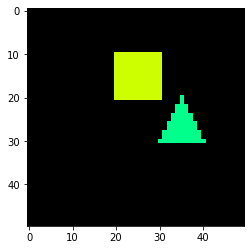

In [17]:
%matplotlib inline
obs = env.reset()
plt.imshow(obs[1].transpose(1, 2, 0))

{'moved': True, 'action': 6, 'mapped-action': 6, 'unmapped-action': 2, 'object': 0, 'direction': 2, 'mapped-object': 1}


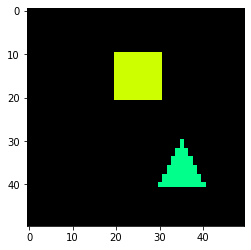

{'moved': True, 'action': 11, 'mapped-action': 11, 'unmapped-action': 7, 'object': 1, 'direction': 3, 'mapped-object': 2}


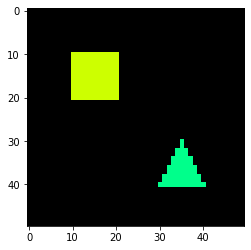

{'moved': True, 'action': 11, 'mapped-action': 11, 'unmapped-action': 7, 'object': 1, 'direction': 3, 'mapped-object': 2}


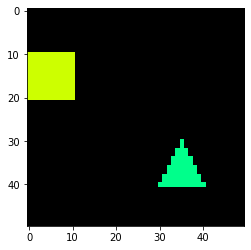

In [18]:
%matplotlib inline
for _ in range(3):
    obs, _, _, info = env.sample_step(filter_moving_prob=1.0)
    plt.imshow(obs[1].transpose(1, 2, 0))
    print(info)
    plt.show()

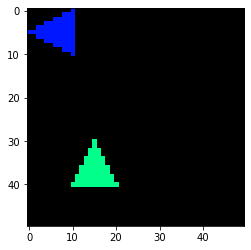

In [19]:
%matplotlib inline
obs = env.reset()
plt.imshow(obs[1].transpose(1, 2, 0))

{'moved': True, 'action': 13, 'mapped-action': 13, 'unmapped-action': 5, 'object': 1, 'direction': 1, 'mapped-object': 3}


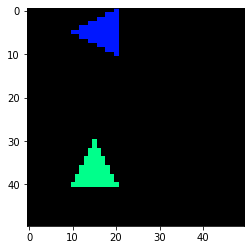

{'moved': True, 'action': 13, 'mapped-action': 13, 'unmapped-action': 5, 'object': 1, 'direction': 1, 'mapped-object': 3}


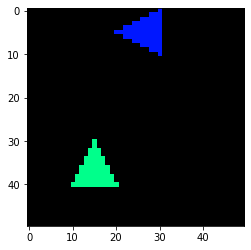

{'moved': True, 'action': 7, 'mapped-action': 7, 'unmapped-action': 3, 'object': 0, 'direction': 3, 'mapped-object': 1}


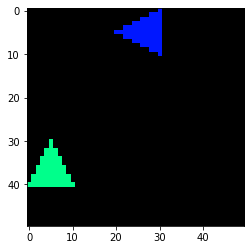

In [20]:
%matplotlib inline
for _ in range(3):
    obs, _, _, info = env.sample_step(filter_moving_prob=1.0)
    plt.imshow(obs[1].transpose(1, 2, 0))
    print(info)
    plt.show()

# eval

In [ ]:
env_eval = BlockPushingObjectLibrary(
    object_library=object_library,
    mode='eval',
    num_objects_scene=2,
    num_objects_total=4,
    num_config_train=3,
    num_config_eval=3,
    check_collision=True, filter_collision=True,
)

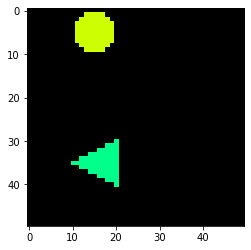

In [77]:
%matplotlib inline
obs = env_eval.reset()
plt.imshow(obs[1].transpose(1, 2, 0))

# render all

In [52]:
image = env.object_library.render_all(pos='ordered')

> positions <-> id [0, 1, 2, 3] [(0, 0), (0, 1), (0, 2), (0, 3)]


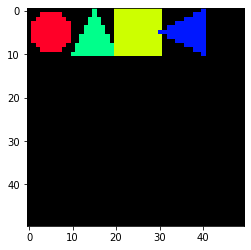

In [53]:
plt.imshow(image.transpose(1, 2, 0))